# Testing Sensitiviy of ssPopModel



The R package `ssPopModel` uses DEoptim to estimate the growth rate of certain phytoplankton cells. Two of the input parameters of this model are the `width` of a size class (size classes are a way of binning the size of cells), and a change in time `dt`. The ideal `width` and `dt` would be such that every change in `dt`, each and every cell either stays in its current size class, or jumps *one* size class. This experiment explores the possible `width` and `dt` parameters.

We'll first load the libraries and set up our paths.

In [1]:
library(ssPopModel)
library(gplots)

# Path to the model outputs 
path.to.data <- "~/ssPopModel_sensitivity_test/ssPopModel_sensitivity_test_data"
path.to.git.repository <- "~/ssPopModel_sensitivity_test"
setwd(path.to.git.repository)

Loading required package: DEoptim
Loading required package: parallel

DEoptim package
Differential Evolution algorithm in R
Authors: D. Ardia, K. Mullen, B. Peterson and J. Ulrich

Loading required package: popcycle
Loading required package: RSQLite
Loading required package: splancs
Loading required package: sp

Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis

Loading required package: plyr
Loading required package: uuid
Loading required package: tools

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



We chose to run the model with `width` parameters ranging from 0.0 to 0.15, and for each of those runs, with `dt` parameters ranging from 0.0 to 30.0. There was 69 unique `width's` and 59 unique `dt's` for a total of 4071 runs.

After running the models, the next step is to merge all of the outputs into one data frame for analysis.

To do this, we loop through each output file and append each parameter of interest onto a data frame.

In this case, we are interested in looking at the following parameters:

* `gmax`: maximum growth fraction
* `dmax`: maximum division fraction
* `b`: division function shape parameter
* `E_Star`: growth function shape parameter
* `resnorm`: the difference between observed results and model results


As well as `gr`, the growth rate.

We are also want to look at the `N(t)`, the total number of observed cells at each time step.

In [4]:
# Merge the model outputs
# Get the list out output files, looking only at size distribtuion models
list.output <- list.files("output_matrix", "size", full.names=T)

# Create the empty data frame to store all the output parameters
DF <- NULL

# Create the empty list to store each N matrix
N.all <- NULL


i <- 1

for(path.distribution in list.output){
    # first print file name
    print(path.distribution)
    # load the first file
    load(path.distribution)
    # get the size, origin, and dt from the filename
    file.name <- unlist(list(strsplit(basename(path.distribution), "_")))
    origin <- file.name[1]
    size <- as.numeric(file.name[3])
    dt <- as.numeric(file.name[4])


    # on the first file, save the first matrices for V and N
    if (i == 1) {
        N.all <- model1[4,2][[1]]
    }

    # on the rest of the files, get the matrices and bind them
    # on the rest
    else {
        Nproj <- model1[4,2][[1]]
        N.all <- cbind(N.all, Nproj)
    }

    # get the parameters
    params <- model1[,2][[1]]
    gr <- model1[,2][[2]]
    # save all the parameters
    df <- data.frame(origin, size, dt, params,gr=sum(gr,na.rm=T))
    DF <- data.frame(rbind(DF, df))
    i <- i + 1
}

# Re-order each N matrix
N <- N.all[, order(as.numeric(colnames(N.all)))]

# The order of the "dt" column needs to be fixed to be numerical
DF <- DF[order(as.numeric(DF$dt)),]



[1] "output_matrix/size_modeloutput_0.03_1"
[1] "output_matrix/size_modeloutput_0.03_1.5"
[1] "output_matrix/size_modeloutput_0.03_10"
[1] "output_matrix/size_modeloutput_0.03_10.5"
[1] "output_matrix/size_modeloutput_0.03_11"
[1] "output_matrix/size_modeloutput_0.03_11.5"
[1] "output_matrix/size_modeloutput_0.03_12"
[1] "output_matrix/size_modeloutput_0.03_12.5"
[1] "output_matrix/size_modeloutput_0.03_13"
[1] "output_matrix/size_modeloutput_0.03_13.5"
[1] "output_matrix/size_modeloutput_0.03_14"
[1] "output_matrix/size_modeloutput_0.03_14.5"
[1] "output_matrix/size_modeloutput_0.03_15"
[1] "output_matrix/size_modeloutput_0.03_15.5"
[1] "output_matrix/size_modeloutput_0.03_16"
[1] "output_matrix/size_modeloutput_0.03_16.5"
[1] "output_matrix/size_modeloutput_0.03_17"
[1] "output_matrix/size_modeloutput_0.03_17.5"
[1] "output_matrix/size_modeloutput_0.03_18"
[1] "output_matrix/size_modeloutput_0.03_18.5"
[1] "output_matrix/size_modeloutput_0.03_19"
[1] "output_matrix/size_modeloutput_0

Warning message in order(as.numeric(colnames(N.all))):
“NAs introduced by coercion”

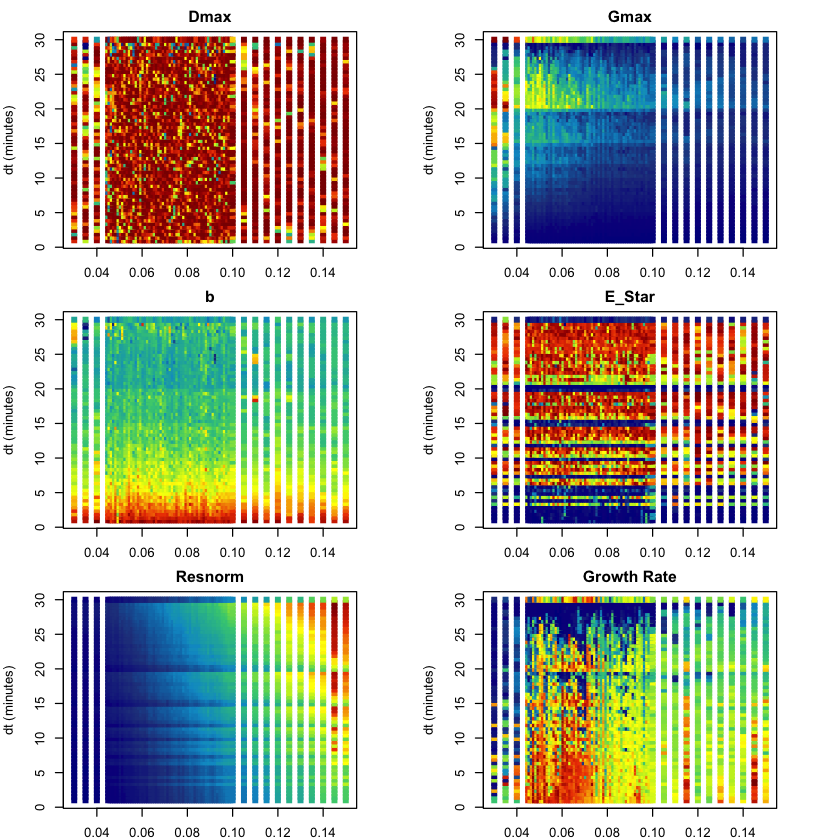

In [5]:
# To easily visualize how each parameter changes with both `size` and `dt`, we can plot them as a matrix

# These are the colors we will be using on our heatmap
cols <- colorRampPalette(c("blue4","royalblue4","deepskyblue3", "seagreen3", "yellow", "orangered2","darkred"))

# Plotting each parameter as a heatmap
par(mfrow=c(3,2),pty='m', mar=c(2,4,2,4))
plot(DF$size, DF$dt, col=cols(100)[cut(DF$dmax,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="Dmax")
plot(DF$size, DF$dt, col=cols(100)[cut(DF$gmax,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="Gmax")
plot(DF$size, DF$dt, col=cols(100)[cut(DF$b,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="b")
plot(DF$size, DF$dt, col=cols(100)[cut(DF$E_star,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="E_Star")
plot(DF$size, DF$dt, col=cols(100)[cut(DF$resnorm,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="Resnorm")
plot(DF$size, DF$dt, col=cols(100)[cut(DF$gr,100)],
     pch=15, cex=1, xlab="Size", ylab="dt (minutes)", main="Growth Rate")


In [ ]:
# To see how gamma responds to par for each run of the simulation, we can plot:

# Get the par data
Par <- read.csv("Par.csv")

# get the max gamma
max <- max(DF$gmax * (1 - exp(-1000)/DF$E_star),
    na.rm = T)

# plot the first gamma
plot(seq(0, max(Par$par), by=10),
    DF$gmax[1] * (1 - exp(-seq(0, max(Par$par), by=10)/DF$E_star[1])),
    ylim = c(0, max), type = "l", col = "#00007F",
    lwd = 0.1, xlab = "Light Intensity",
    ylab = paste("Gamma (per", 10, "min)"))

# plot the rest of the gamma's
for (i in 2:length(DF$gmax)) {

    #if (i %% 50 != 0) next

    points(seq(0, max(Par$par), by=10),
        DF$gmax[i] * (1 - exp(-seq(0, max(Par$par), by=10)/DF$E_star[i])),
        ylim = c(0, max), type = "l", col = i,
        lwd = 0.1, xlab = "Light Intensity",
        ylab = paste("Gamma (per", 10, "min)"))


}